In [1]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
import time

In [ ]:
#face = sp.misc.face(gray = True)
#n_clusters = 5
#np.random.seed(0)
#X = face.reshape((-1,1))
#k_Means= cluster.KMeans(n_clusters=n_clusters,n_init=4)
#k_Means.fit(X)

#plt.figure(figsize=(8, 3.5))
#plt.subplot(121)
#plt.imshow(X, cmap='gray')
#plt.axis('off')

#plt.tight_layout()
#plt.show()

In [2]:
face = sp.misc.face(gray=True)

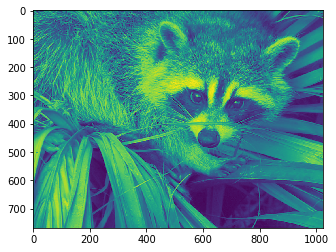

In [3]:
#face
plt.imshow(face)

In [4]:
# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.10) / 255.

C:\Users\biltu.khawas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


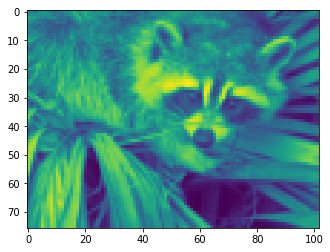

In [5]:
plt.imshow(face)

In [9]:
#Convert the image into a graph with the value of the gradient on the edges.
graph = image.img_to_graph(face)

In [18]:
#graph.data
#graph.data.std()

0.31384533083812466

In [10]:
# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

In [12]:
# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 5

C:\Users\biltu.khawas\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


Spectral clustering: kmeans, 5.76s
Spectral clustering: discretize, 4.41s


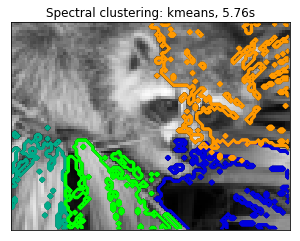

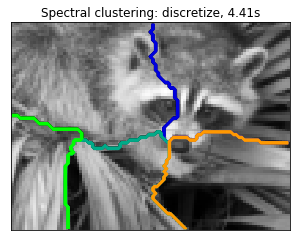

In [16]:

for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS, assign_labels=assign_labels, random_state=1)
    
    t1 = time.time()
    labels = labels.reshape(face.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1, colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
        
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()